# Auto ARIMA in Code Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pmdarima as pm

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col="Month", parse_dates=True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
model = pm.auto_arima(train['Passengers'], trace=True, suppress_warnings=True, seasonal=True, m=12 )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.28 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.060, Time=1.92 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.20 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.42 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.08 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 29 Nov 2024   AIC                            905.686
Time:                                    18:43:03   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

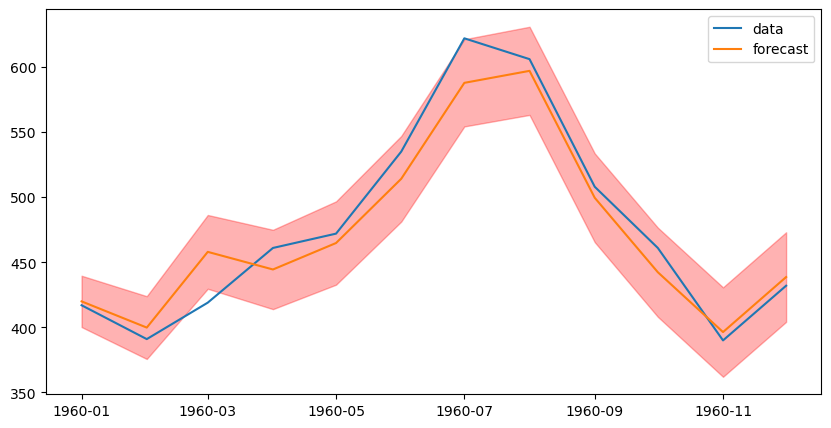

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

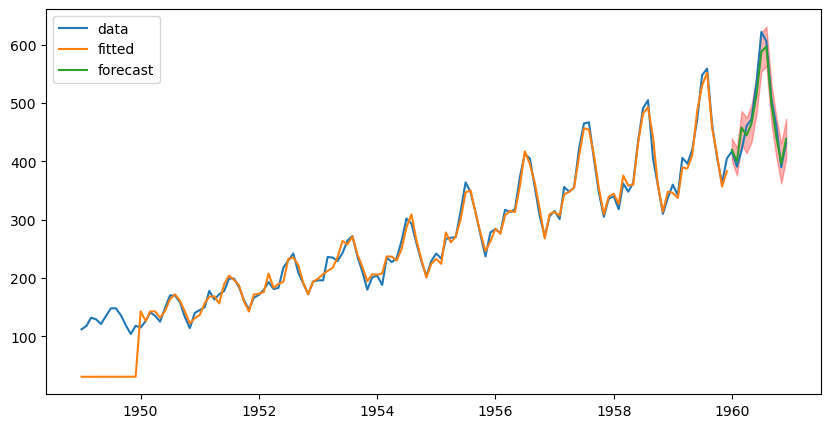

In [10]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

In [11]:
logmodel = pm.auto_arima(train['LogPassengers'], trace=True, suppress_warnings=True, seasonal=True, m=12 )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.523, Time=1.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.66 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.40 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=2.36 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=1.38 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.572, Time=1.23 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.50 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-442.878, Time=1.43 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.432, Time=2.24 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [12]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Fri, 29 Nov 2024   AIC                           -448.052
Time:                                      18:44:04   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.153      0.031       0.002       0.037
ar.L1          0.6004      0.083      7.273      0.000       0.439       0.762
ar.L2          0.2416      0.085      2.851      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.415      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.190      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.08
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

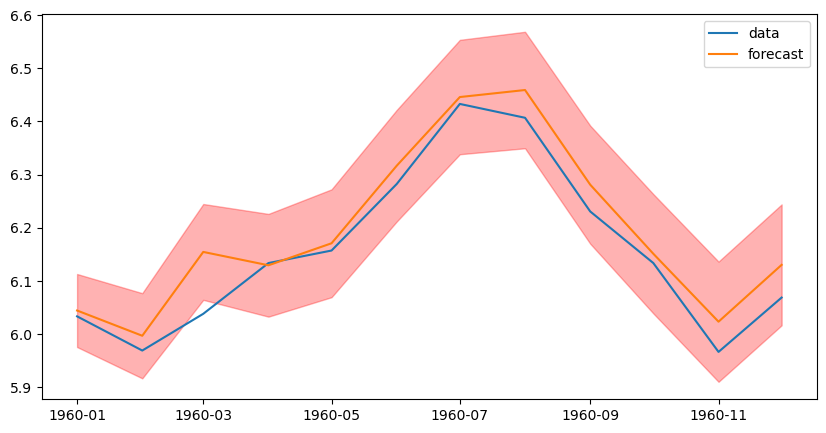

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

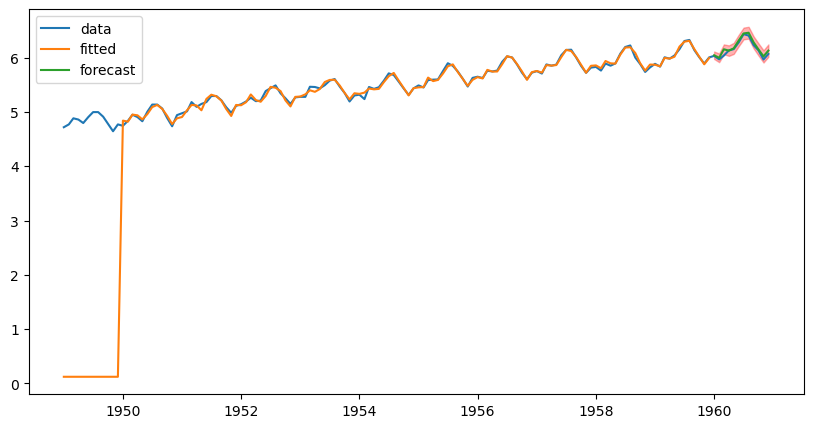

In [17]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

In [22]:
def rmse(t, y):
    return np.sqrt(np.mean((t -y)**2))

In [24]:
# Forecast RSME
print("Non-logged RMSE: ", rmse(test['Passengers'], test_pred))
print("Logged RSME: ", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE:  18.53646875174649
Logged RSME:  23.042903552058952
